<a href="https://colab.research.google.com/github/zodplugin/pengolahan-citra/blob/main/M1_Pengolahan_Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!pip install pillow
!pip install pandas
!pip install matplotlib
!pip install opencv-python
import cv2
import pandas as pd
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
im = Image.open('sample_data/testing.jpg')
image = im.resize((100, 100))
pixels = list(image.getdata())

In [64]:
output = pd.DataFrame(pixels)
dfx = output.rename(columns={0: 'Red',1 : "Green", 2: "Blue"})
print(dfx)

      Red  Green  Blue
0     178    128    85
1     181    132    87
2     103     78    50
3      26     30    23
4      33     37    24
...   ...    ...   ...
9995  112     67    38
9996  113     68    39
9997  114     67    39
9998  108     65    36
9999  102     66    34

[10000 rows x 3 columns]


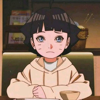

In [65]:
image

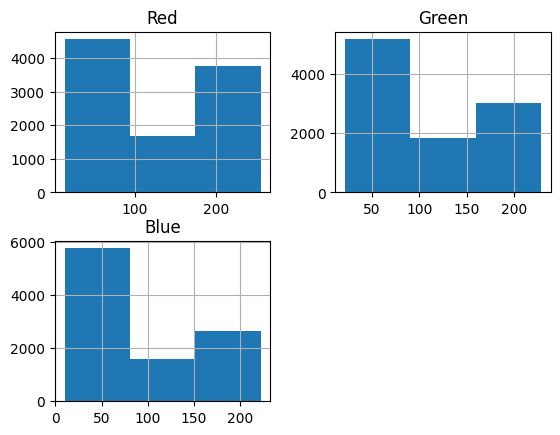

In [66]:
hist = dfx.hist(bins=3)

In [67]:
greyscale = Image.open('sample_data/testing.jpg').convert('L')
image = greyscale.resize((100, 100))
pixels = list(image.getdata())
output = pd.DataFrame(pixels)
df = output.rename(columns={0: "Greyscale"})
print(df)

      Greyscale
0           138
1           142
2            82
3            29
4            34
...         ...
9995         77
9996         78
9997         78
9998         75
9999         73

[10000 rows x 1 columns]


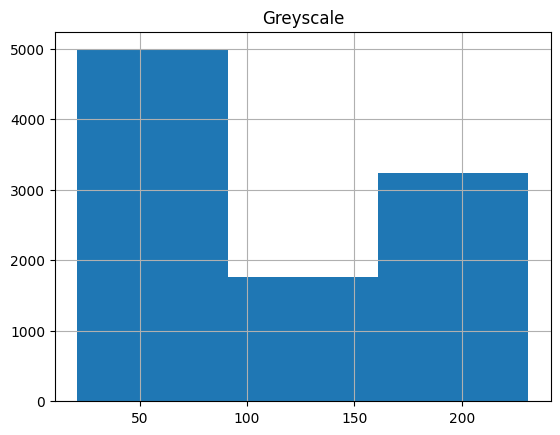

In [68]:
hist = df.hist(bins=3)

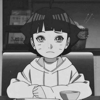

In [69]:
image

In [70]:
# Tampilkan nilai R , G , B

def get_value(list, value):
    for i in range(0,256):
        temp = 0
        for j in list:
            if j == i:
                temp+=1
        value.append(temp)

In [94]:
value_r = []
value_g = []
value_b = []
greyscale = []
hue_r = []
hue_g = []
hue_b = []
# get value red
get_value(dfx["Red"],value_r)
# get value blue
get_value(dfx["Green"], value_g)
# get value red
get_value(dfx["Blue"], value_b)
  # get value greyscale
for i in range(len(value_r)):
  grey_mean = (value_r[i] + value_g[i] + value_b[i]) / 3
  greyscale.append(round(grey_mean))

hue = Image.open('sample_data/testing.jpg').convert('HSV')
pixelshue = list(hue.getdata())
dxhue = pd.DataFrame(pixelshue)
dfxhue = dxhue.rename(columns={0: 'Red',1 : "Green", 2: "Blue"})


img = Image.open('sample_data/testing.jpg')
satur = ImageEnhance.Color(img)
saturfix = satur.enhance(0.5)
pixelssatur = list(saturfix.getdata())
dxsatur = pd.DataFrame(pixelssatur)
dfxsatur = dxsatur.rename(columns={0: 'Red',1 : "Green", 2: "Blue"})


lightness = ImageEnhance.Brightness(img).enhance(1.5)
pixelslightness = list(lightness.getdata())
dxlightness = pd.DataFrame(pixelslightness)
dfxlightness = dxlightness.rename(columns={0: 'Red',1 : "Green", 2: "Blue"})





rgb = pd.DataFrame({'Red': value_r,'Green': value_g, 'Blue':value_b, 'Greyscale' : greyscale})


print(rgb.to_string())
print('Sum: \t'+str(sum(value_r))+'\t'+str(sum(value_g))+'\t'+str(sum(value_b))+'\t'+str(sum(greyscale)))

     Red  Green  Blue  Greyscale
0      0      0     0          0
1      0      0     0          0
2      0      0     0          0
3      0      0     0          0
4      0      0     0          0
5      0      0     0          0
6      0      0     0          0
7      0      0     0          0
8      0      0     0          0
9      0      0     0          0
10     0      0     1          0
11     0      0     1          0
12     0      0     2          1
13     0      0     2          1
14     1      0     1          1
15     0      0     2          1
16     0      0     6          2
17     0      0     6          2
18     0      0     7          2
19     1      0    16          6
20     3      0    30         11
21     4      0    26         10
22     3      1    45         16
23     5      4    64         24
24     8      7    79         31
25     8      9   110         42
26    12      8    86         35
27    14      6    87         36
28     6      9    98         38
29    11  

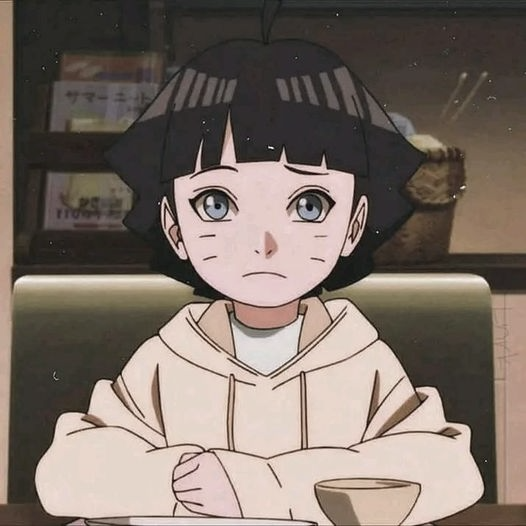

In [77]:
saturfix

In [78]:
dfxhue

,Red,Green,Blue
0,19,171,143
1,19,171,143
2,19,167,140
3,19,166,141
4,20,160,141
...,...,...,...
276671,18,207,86
276672,19,206,84
276673,20,205,83
276674,20,205,83


In [88]:
dfxsatur

,Red,Green,Blue
0,122,97,74
1,122,97,74
2,120,96,74
3,121,97,75
4,122,98,77
...,...,...,...
276671,70,51,35
276672,69,51,35
276673,69,51,35
276674,69,51,35


In [95]:
dfxlightness

,Red,Green,Blue
0,214,138,70
1,214,138,70
2,210,136,72
3,211,138,73
4,211,141,78
...,...,...,...
276671,129,70,24
276672,126,72,24
276673,124,72,24
276674,124,72,24


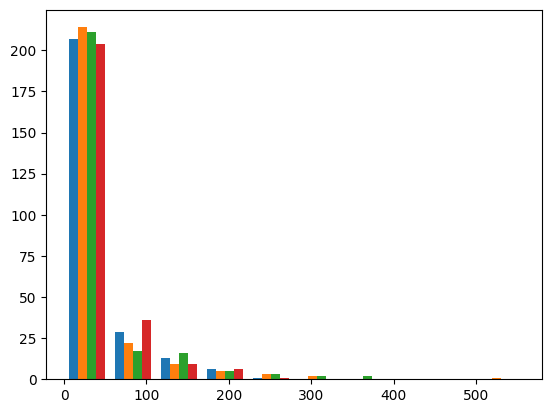

In [79]:
hist = plt.hist(rgb)

In [80]:
value = []

def minmaxscaler(min,max,list):
    for i in list:
        value.append((i-min)/(max-min))


minmaxscaler(min(greyscale), max(greyscale), greyscale)
grey_df = pd.DataFrame({'Red': value_r,'Green': value_g, 'Blue':value_b, 'Greyscale Normalization':value})
print(grey_df.to_string())


     Red  Green  Blue  Greyscale Normalization
0      0      0     0                 0.000000
1      0      0     0                 0.000000
2      0      0     0                 0.000000
3      0      0     0                 0.000000
4      0      0     0                 0.000000
5      0      0     0                 0.000000
6      0      0     0                 0.000000
7      0      0     0                 0.000000
8      0      0     0                 0.000000
9      0      0     0                 0.000000
10     0      0     1                 0.000000
11     0      0     1                 0.000000
12     0      0     2                 0.004348
13     0      0     2                 0.004348
14     1      0     1                 0.004348
15     0      0     2                 0.004348
16     0      0     6                 0.008696
17     0      0     6                 0.008696
18     0      0     7                 0.008696
19     1      0    16                 0.026087
20     3     

In [81]:
# Convert the image to the HSL color space
image = cv2.imread("sample_data/testing.jpg")
resized_image = cv2.resize(image, (250, 300))
hsl_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2HLS)

In [82]:
# Extract HSL channels
h_channel, l_channel, s_channel = cv2.split(hsl_image)

In [83]:
cv2.imwrite('hsl_image.jpg', hsl_image)

True

In [84]:
hue = Image.open('sample_data/testing.jpg').convert('HSV')
pixelshue = list(hue.getdata())
output = pd.DataFrame(pixelshue)

In [85]:
print(output)


         0    1    2
0       19  171  143
1       19  171  143
2       19  167  140
3       19  166  141
4       20  160  141
...     ..  ...  ...
276671  18  207   86
276672  19  206   84
276673  20  205   83
276674  20  205   83
276675  21  205   82

[276676 rows x 3 columns]


In [86]:
hue

ValueError: ignored

<PIL.Image.Image image mode=HSV size=526x526>